## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9959448	total: 58.7ms	remaining: 58.6s
1:	learn: 0.9768048	total: 59.6ms	remaining: 29.7s
2:	learn: 0.9558641	total: 60.5ms	remaining: 20.1s
3:	learn: 0.9389712	total: 61.5ms	remaining: 15.3s
4:	learn: 0.9220567	total: 62.5ms	remaining: 12.4s
5:	learn: 0.9052212	total: 63.3ms	remaining: 10.5s
6:	learn: 0.8893801	total: 64.2ms	remaining: 9.11s
7:	learn: 0.8735543	total: 65.1ms	remaining: 8.07s
8:	learn: 0.8578077	total: 65.9ms	remaining: 7.25s
9:	learn: 0.8413991	total: 66.5ms	remaining: 6.59s
10:	learn: 0.8256062	total: 67.3ms	remaining: 6.05s
11:	learn: 0.8112189	total: 68.1ms	remaining: 5.6s
12:	learn: 0.7958682	total: 68.9ms	remaining: 5.23s
13:	learn: 0.7822009	total: 70ms	remaining: 4.93s
14:	learn: 0.7687014	total: 71ms	remaining: 4.66s
15:	learn: 0.7551962	total: 71.8ms	remaining: 4.41s
16:	learn: 0.7431917	total: 72.6ms	remaining: 4.2s
17:	learn: 0.7319391	total: 73.4ms	remaining: 4s
18:	learn: 0.7193980	total: 74.4ms	remaining: 3.84s
1

49:	learn: 0.4752416	total: 99.6ms	remaining: 1.89s
50:	learn: 0.4694918	total: 101ms	remaining: 1.87s
51:	learn: 0.4641947	total: 102ms	remaining: 1.85s
52:	learn: 0.4586489	total: 102ms	remaining: 1.83s
53:	learn: 0.4546653	total: 103ms	remaining: 1.8s
54:	learn: 0.4498769	total: 104ms	remaining: 1.78s
55:	learn: 0.4461141	total: 105ms	remaining: 1.76s
56:	learn: 0.4420629	total: 105ms	remaining: 1.74s
57:	learn: 0.4375247	total: 106ms	remaining: 1.73s
58:	learn: 0.4342164	total: 107ms	remaining: 1.71s
59:	learn: 0.4301948	total: 108ms	remaining: 1.69s
60:	learn: 0.4252890	total: 109ms	remaining: 1.68s
61:	learn: 0.4202896	total: 110ms	remaining: 1.66s
62:	learn: 0.4173713	total: 111ms	remaining: 1.65s
63:	learn: 0.4135418	total: 111ms	remaining: 1.63s
64:	learn: 0.4097632	total: 112ms	remaining: 1.61s
65:	learn: 0.4063837	total: 113ms	remaining: 1.6s
66:	learn: 0.4028727	total: 114ms	remaining: 1.58s
67:	learn: 0.3997341	total: 115ms	remaining: 1.57s
68:	learn: 0.3959366	total: 116m

151:	learn: 0.2595420	total: 191ms	remaining: 1.06s
152:	learn: 0.2589219	total: 192ms	remaining: 1.06s
153:	learn: 0.2579484	total: 193ms	remaining: 1.06s
154:	learn: 0.2572014	total: 194ms	remaining: 1.05s
155:	learn: 0.2562379	total: 194ms	remaining: 1.05s
156:	learn: 0.2552591	total: 195ms	remaining: 1.05s
157:	learn: 0.2544182	total: 196ms	remaining: 1.04s
158:	learn: 0.2535206	total: 197ms	remaining: 1.04s
159:	learn: 0.2527479	total: 198ms	remaining: 1.04s
160:	learn: 0.2518286	total: 199ms	remaining: 1.03s
161:	learn: 0.2514432	total: 199ms	remaining: 1.03s
162:	learn: 0.2509464	total: 200ms	remaining: 1.03s
163:	learn: 0.2502988	total: 201ms	remaining: 1.02s
164:	learn: 0.2496407	total: 202ms	remaining: 1.02s
165:	learn: 0.2488490	total: 203ms	remaining: 1.02s
166:	learn: 0.2481881	total: 204ms	remaining: 1.01s
167:	learn: 0.2473161	total: 204ms	remaining: 1.01s
168:	learn: 0.2467045	total: 205ms	remaining: 1.01s
169:	learn: 0.2459364	total: 206ms	remaining: 1.01s
170:	learn: 

263:	learn: 0.1933923	total: 289ms	remaining: 807ms
264:	learn: 0.1930760	total: 290ms	remaining: 805ms
265:	learn: 0.1927681	total: 291ms	remaining: 803ms
266:	learn: 0.1923701	total: 292ms	remaining: 801ms
267:	learn: 0.1918180	total: 293ms	remaining: 799ms
268:	learn: 0.1912694	total: 293ms	remaining: 797ms
269:	learn: 0.1907849	total: 294ms	remaining: 795ms
270:	learn: 0.1903799	total: 295ms	remaining: 794ms
271:	learn: 0.1899733	total: 296ms	remaining: 792ms
272:	learn: 0.1895027	total: 297ms	remaining: 791ms
273:	learn: 0.1890701	total: 298ms	remaining: 789ms
274:	learn: 0.1887525	total: 298ms	remaining: 787ms
275:	learn: 0.1884290	total: 299ms	remaining: 785ms
276:	learn: 0.1882971	total: 300ms	remaining: 783ms
277:	learn: 0.1881187	total: 301ms	remaining: 781ms
278:	learn: 0.1879589	total: 302ms	remaining: 779ms
279:	learn: 0.1878617	total: 302ms	remaining: 778ms
280:	learn: 0.1877074	total: 303ms	remaining: 776ms
281:	learn: 0.1873903	total: 304ms	remaining: 774ms
282:	learn: 

374:	learn: 0.1565530	total: 381ms	remaining: 635ms
375:	learn: 0.1565074	total: 382ms	remaining: 633ms
376:	learn: 0.1562391	total: 383ms	remaining: 632ms
377:	learn: 0.1559880	total: 383ms	remaining: 631ms
378:	learn: 0.1558207	total: 385ms	remaining: 631ms
379:	learn: 0.1553985	total: 386ms	remaining: 629ms
380:	learn: 0.1551398	total: 387ms	remaining: 628ms
381:	learn: 0.1548463	total: 387ms	remaining: 627ms
382:	learn: 0.1544506	total: 388ms	remaining: 625ms
383:	learn: 0.1542214	total: 389ms	remaining: 624ms
384:	learn: 0.1537670	total: 390ms	remaining: 622ms
385:	learn: 0.1535851	total: 390ms	remaining: 621ms
386:	learn: 0.1533215	total: 391ms	remaining: 620ms
387:	learn: 0.1531923	total: 392ms	remaining: 618ms
388:	learn: 0.1528820	total: 393ms	remaining: 617ms
389:	learn: 0.1528373	total: 394ms	remaining: 616ms
390:	learn: 0.1525038	total: 395ms	remaining: 615ms
391:	learn: 0.1523901	total: 395ms	remaining: 613ms
392:	learn: 0.1523417	total: 396ms	remaining: 612ms
393:	learn: 

491:	learn: 0.1285418	total: 479ms	remaining: 495ms
492:	learn: 0.1282899	total: 480ms	remaining: 493ms
493:	learn: 0.1282693	total: 481ms	remaining: 493ms
494:	learn: 0.1280699	total: 482ms	remaining: 492ms
495:	learn: 0.1279033	total: 483ms	remaining: 491ms
496:	learn: 0.1276414	total: 484ms	remaining: 490ms
497:	learn: 0.1273843	total: 485ms	remaining: 488ms
498:	learn: 0.1271616	total: 485ms	remaining: 487ms
499:	learn: 0.1269417	total: 486ms	remaining: 486ms
500:	learn: 0.1265266	total: 487ms	remaining: 485ms
501:	learn: 0.1262231	total: 488ms	remaining: 484ms
502:	learn: 0.1260069	total: 489ms	remaining: 483ms
503:	learn: 0.1259819	total: 490ms	remaining: 482ms
504:	learn: 0.1257598	total: 491ms	remaining: 481ms
505:	learn: 0.1254954	total: 491ms	remaining: 480ms
506:	learn: 0.1252987	total: 492ms	remaining: 479ms
507:	learn: 0.1249795	total: 493ms	remaining: 477ms
508:	learn: 0.1246973	total: 494ms	remaining: 476ms
509:	learn: 0.1244803	total: 495ms	remaining: 475ms
510:	learn: 

599:	learn: 0.1071498	total: 571ms	remaining: 381ms
600:	learn: 0.1070283	total: 572ms	remaining: 380ms
601:	learn: 0.1069091	total: 573ms	remaining: 379ms
602:	learn: 0.1066741	total: 573ms	remaining: 378ms
603:	learn: 0.1065163	total: 574ms	remaining: 377ms
604:	learn: 0.1062762	total: 575ms	remaining: 375ms
605:	learn: 0.1061543	total: 576ms	remaining: 374ms
606:	learn: 0.1059964	total: 577ms	remaining: 373ms
607:	learn: 0.1058407	total: 578ms	remaining: 372ms
608:	learn: 0.1056345	total: 578ms	remaining: 371ms
609:	learn: 0.1054211	total: 579ms	remaining: 370ms
610:	learn: 0.1052259	total: 580ms	remaining: 369ms
611:	learn: 0.1051312	total: 581ms	remaining: 368ms
612:	learn: 0.1050884	total: 582ms	remaining: 367ms
613:	learn: 0.1050197	total: 582ms	remaining: 366ms
614:	learn: 0.1049705	total: 583ms	remaining: 365ms
615:	learn: 0.1049062	total: 584ms	remaining: 364ms
616:	learn: 0.1047585	total: 585ms	remaining: 363ms
617:	learn: 0.1046138	total: 586ms	remaining: 362ms
618:	learn: 

716:	learn: 0.0895639	total: 670ms	remaining: 264ms
717:	learn: 0.0894619	total: 671ms	remaining: 263ms
718:	learn: 0.0893638	total: 672ms	remaining: 262ms
719:	learn: 0.0892068	total: 672ms	remaining: 261ms
720:	learn: 0.0890099	total: 673ms	remaining: 260ms
721:	learn: 0.0888980	total: 674ms	remaining: 260ms
722:	learn: 0.0888813	total: 675ms	remaining: 259ms
723:	learn: 0.0887157	total: 676ms	remaining: 258ms
724:	learn: 0.0886095	total: 677ms	remaining: 257ms
725:	learn: 0.0884992	total: 678ms	remaining: 256ms
726:	learn: 0.0883251	total: 679ms	remaining: 255ms
727:	learn: 0.0881852	total: 679ms	remaining: 254ms
728:	learn: 0.0880493	total: 680ms	remaining: 253ms
729:	learn: 0.0878307	total: 681ms	remaining: 252ms
730:	learn: 0.0877080	total: 682ms	remaining: 251ms
731:	learn: 0.0875953	total: 682ms	remaining: 250ms
732:	learn: 0.0875487	total: 683ms	remaining: 249ms
733:	learn: 0.0874191	total: 684ms	remaining: 248ms
734:	learn: 0.0872854	total: 685ms	remaining: 247ms
735:	learn: 

825:	learn: 0.0763800	total: 762ms	remaining: 160ms
826:	learn: 0.0763163	total: 763ms	remaining: 160ms
827:	learn: 0.0761967	total: 764ms	remaining: 159ms
828:	learn: 0.0760655	total: 764ms	remaining: 158ms
829:	learn: 0.0758848	total: 765ms	remaining: 157ms
830:	learn: 0.0758220	total: 766ms	remaining: 156ms
831:	learn: 0.0757362	total: 767ms	remaining: 155ms
832:	learn: 0.0756445	total: 767ms	remaining: 154ms
833:	learn: 0.0755025	total: 768ms	remaining: 153ms
834:	learn: 0.0753546	total: 769ms	remaining: 152ms
835:	learn: 0.0752138	total: 770ms	remaining: 151ms
836:	learn: 0.0750754	total: 771ms	remaining: 150ms
837:	learn: 0.0749863	total: 772ms	remaining: 149ms
838:	learn: 0.0749357	total: 773ms	remaining: 148ms
839:	learn: 0.0747831	total: 773ms	remaining: 147ms
840:	learn: 0.0746587	total: 774ms	remaining: 146ms
841:	learn: 0.0744418	total: 775ms	remaining: 145ms
842:	learn: 0.0742574	total: 776ms	remaining: 144ms
843:	learn: 0.0741237	total: 776ms	remaining: 144ms
844:	learn: 

942:	learn: 0.0641540	total: 860ms	remaining: 52ms
943:	learn: 0.0640320	total: 861ms	remaining: 51.1ms
944:	learn: 0.0639551	total: 862ms	remaining: 50.1ms
945:	learn: 0.0637915	total: 862ms	remaining: 49.2ms
946:	learn: 0.0637019	total: 863ms	remaining: 48.3ms
947:	learn: 0.0636901	total: 864ms	remaining: 47.4ms
948:	learn: 0.0636549	total: 865ms	remaining: 46.5ms
949:	learn: 0.0635363	total: 866ms	remaining: 45.6ms
950:	learn: 0.0634571	total: 867ms	remaining: 44.6ms
951:	learn: 0.0633882	total: 867ms	remaining: 43.7ms
952:	learn: 0.0632977	total: 868ms	remaining: 42.8ms
953:	learn: 0.0632115	total: 869ms	remaining: 41.9ms
954:	learn: 0.0631111	total: 870ms	remaining: 41ms
955:	learn: 0.0629874	total: 871ms	remaining: 40.1ms
956:	learn: 0.0629340	total: 872ms	remaining: 39.2ms
957:	learn: 0.0628736	total: 872ms	remaining: 38.2ms
958:	learn: 0.0627557	total: 873ms	remaining: 37.3ms
959:	learn: 0.0627170	total: 874ms	remaining: 36.4ms
960:	learn: 0.0626650	total: 875ms	remaining: 35.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

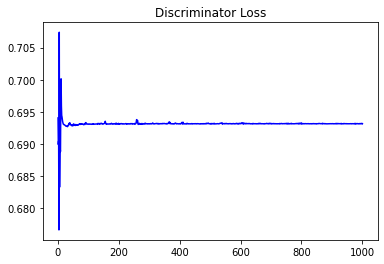

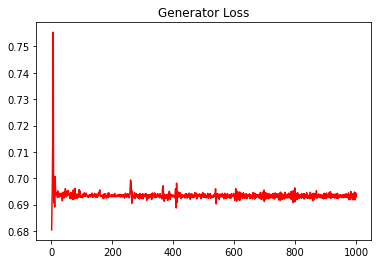

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10272833577358939


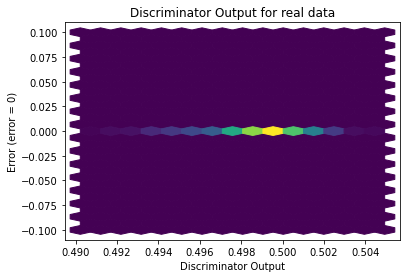

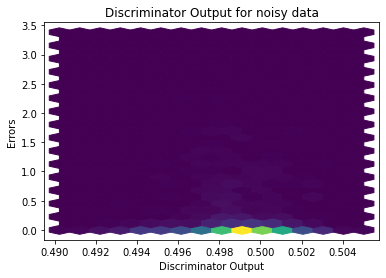

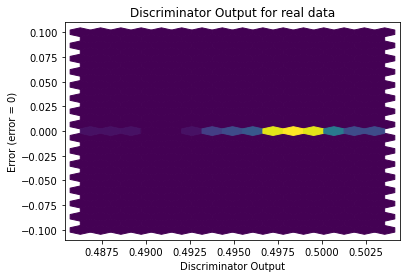

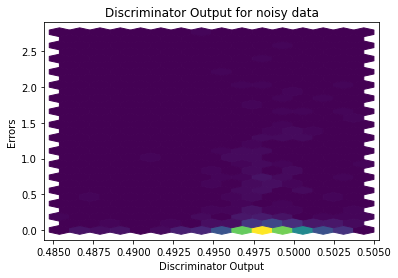

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


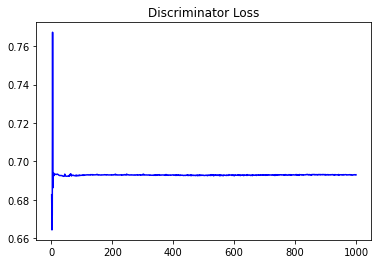

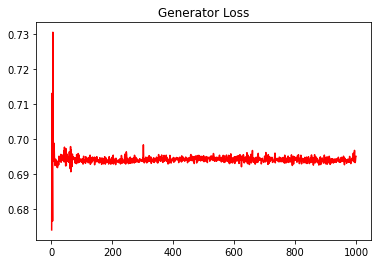

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10931106170046552


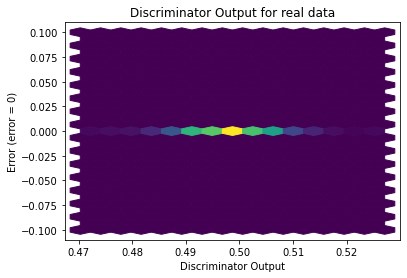

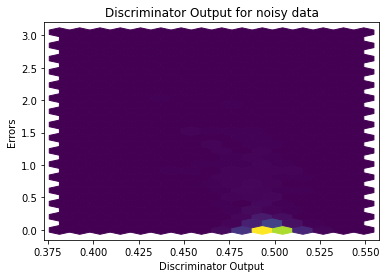

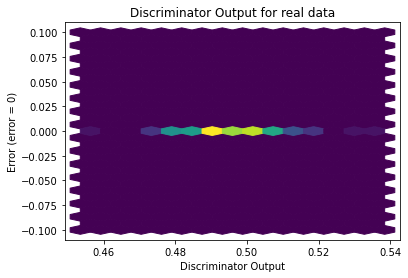

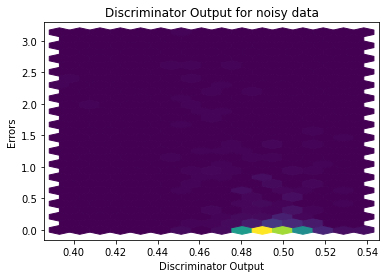

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1156]], requires_grad=True)
